# <ins>Intuition about Bagging

* Bagging is the combination of two words **Bootstraping** & **Aggregation**
* Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.

### Bootstraping:
* It is a technique in which we drawn the samples randomely from the population.
* Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics.

<img title='Bootstraping' src='images/Bootstrap.png' height=600 width=600 />

###### Bootstrapping in Bagging
* In essence, bootstrapping is random sampling with replacement from the available training data. ... Bagging (= bootstrap aggregation) is performing it many times and training an estimator for each bootstrapped dataset.
* In this method we take the sample dataset from the population and give to the every model a different piece of population sample data.Remember all of the models(algorithms) should be same but data should be different which given to every model. 

<img src='images/bootstraping.webp' width=600 />

<img src='images/bootstrapping2.png' width=600 />

### Aggregation:
* After training the model when we give a new query point to the model and it predict on the basis of majority count that which class is most correct and have high number of votes that predicted point point would be known as Aggregation.

<img title='Bootstrap & Aggregation' src='images/aggregation.png' width=600 />

# <ins>Why use Bagging?

* Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models.
* The bagging technique is useful for both regression and statistical classification. Bagging is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting.

# <ins>When to use Bagging?

* Reduction of variance: Bagging can reduce the variance within a learning algorithm. This is particularly helpful with high-dimensional data, where missing values can lead to higher variance, making it more prone to overfitting and preventing accurate generalization to new datasets.

# <ins>Demo Code

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder = LabelEncoder()

In [5]:
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [8]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

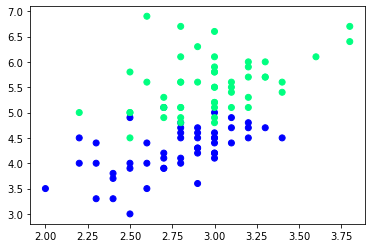

In [10]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [11]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
98,2.5,3.0,1
69,2.5,3.9,1
83,2.7,5.1,1
76,2.8,4.8,1
78,2.9,4.5,1
93,2.3,3.3,1
70,3.2,4.8,1
106,2.5,4.5,2
82,2.7,3.9,1
102,3.0,5.9,2


In [12]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [13]:
df_train

,sepal_width,petal_length,species
149,3.0,5.1,2
96,2.9,4.2,1
94,2.7,4.2,1
82,2.7,3.9,1
55,2.8,4.5,1
50,3.2,4.7,1
112,3.0,5.5,2
52,3.1,4.9,1
103,2.9,5.6,2
145,3.0,5.2,2


In [14]:
df_val

,sepal_width,petal_length,species
70,3.2,4.8,1
92,2.6,4.0,1
97,2.9,4.3,1
102,3.0,5.9,2
65,3.1,4.4,1


In [15]:
df_test

,sepal_width,petal_length,species
134,2.6,5.6,2
74,2.9,4.3,1
121,2.8,4.9,2
147,3.0,5.2,2
120,3.2,5.7,2


In [16]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [17]:
y_test

array([1, 1, 1, 2, 1])

# Case 1 - Bagging

In [18]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True) # by using replace=True (row should be repeated)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
96,2.9,4.2,1
96,2.9,4.2,1
103,2.9,5.6,2
82,2.7,3.9,1
50,3.2,4.7,1
149,3.0,5.1,2
145,3.0,5.2,2
52,3.1,4.9,1


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [20]:
dt_bag1 = DecisionTreeClassifier()  # max_depth automatically None so it works at complete indepth

In [21]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

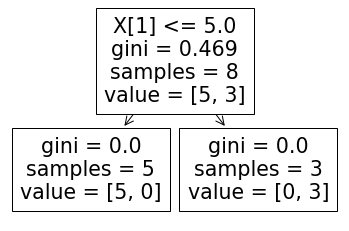

1.0


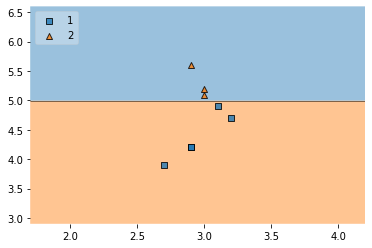

In [22]:
evaluate(dt_bag1,X,y)

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True) # by using replace=True (row should be repeated)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
112,3.0,5.5,2
149,3.0,5.1,2
145,3.0,5.2,2
82,2.7,3.9,1
94,2.7,4.2,1
52,3.1,4.9,1
55,2.8,4.5,1
55,2.8,4.5,1


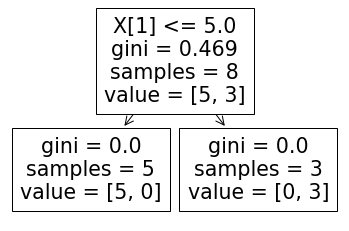

1.0


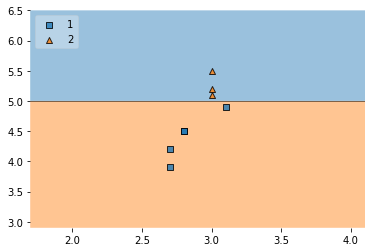

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
52,3.1,4.9,1
112,3.0,5.5,2
94,2.7,4.2,1
103,2.9,5.6,2
96,2.9,4.2,1
96,2.9,4.2,1
96,2.9,4.2,1
50,3.2,4.7,1


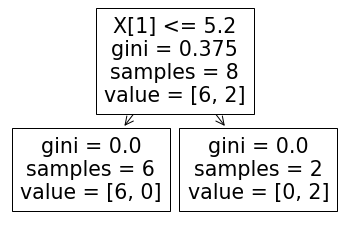

1.0


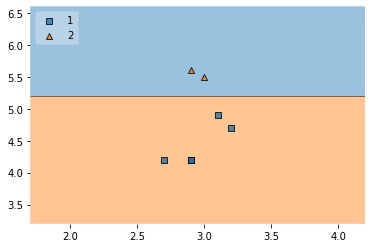

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [27]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

## Predict

In [28]:
df_test

,sepal_width,petal_length,species
134,2.6,5.6,2
74,2.9,4.3,1
121,2.8,4.9,2
147,3.0,5.2,2
120,3.2,5.7,2


In [39]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.2]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,4.3]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8,4.9]).reshape(1,2)))
# as majority count is 1 so output will be 1

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


# Bagging Types

# Pasting

In [40]:
# Row sampling without replacement (do not repeat the rows)
df_train

,sepal_width,petal_length,species
149,3.0,5.1,2
96,2.9,4.2,1
94,2.7,4.2,1
82,2.7,3.9,1
55,2.8,4.5,1
50,3.2,4.7,1
112,3.0,5.5,2
52,3.1,4.9,1
103,2.9,5.6,2
145,3.0,5.2,2


In [41]:
df_train.sample(8) # without rows repeated

,sepal_width,petal_length,species
82,2.7,3.9,1
145,3.0,5.2,2
55,2.8,4.5,1
103,2.9,5.6,2
94,2.7,4.2,1
52,3.1,4.9,1
96,2.9,4.2,1
149,3.0,5.1,2


# Random Subspaces

In [42]:
# In the random subspaces we don't do the row sampling,in this case we just do the column sampling
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [43]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
94,5.6,2.7,4.2,1.3,versicolor
29,4.7,3.2,1.6,0.2,setosa
143,6.8,3.2,5.9,2.3,virginica
18,5.7,3.8,1.7,0.3,setosa
12,4.8,3.0,1.4,0.1,setosa
113,5.7,2.5,5.0,2.0,virginica
21,5.1,3.7,1.5,0.4,setosa
125,7.2,3.2,6.0,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
9,4.9,3.1,1.5,0.1,setosa


In [54]:
df1.sample(2,replace=True,axis=1) # i take the randomely 2 columns with replacement=True

,petal_width,petal_length
94,1.3,4.2
29,0.2,1.6
143,2.3,5.9
18,0.3,1.7
12,0.1,1.4
113,2.0,5.0
21,0.4,1.5
125,1.8,6.0
106,1.7,4.5
9,0.1,1.5


# Random Patches

In [55]:
# In this type we do both, Row sampling and Columns sampling
df1

,sepal_length,sepal_width,petal_length,petal_width,species
94,5.6,2.7,4.2,1.3,versicolor
29,4.7,3.2,1.6,0.2,setosa
143,6.8,3.2,5.9,2.3,virginica
18,5.7,3.8,1.7,0.3,setosa
12,4.8,3.0,1.4,0.1,setosa
113,5.7,2.5,5.0,2.0,virginica
21,5.1,3.7,1.5,0.4,setosa
125,7.2,3.2,6.0,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
9,4.9,3.1,1.5,0.1,setosa


In [56]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,petal_length
94,4.2,4.2
21,1.5,1.5
143,5.9,5.9
113,5.0,5.0
9,1.5,1.5
106,4.5,4.5
125,6.0,6.0
9,1.5,1.5
